# Initial Setups

## autoreload

In [1]:
%load_ext autoreload
%autoreload 2

## dir setup

In [2]:
from dotenv import load_dotenv, find_dotenv
import os

this_file_path = os.path.dirname(os.path.abspath("__file__"))
# if script (not notebook)...
# project_dir = os.path.join(os.path.dirname(__file__), os.pardir)

# project directory
project_dir = os.path.join(this_file_path, os.pardir)

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

In [3]:
raw_data_dir = os.path.join(project_dir, os.environ.get("RAW_DATA_DIR"))
processed_data_dir = os.path.join(project_dir, os.environ.get("PROCESSED_DATA_DIR"))
interim_data_dir = os.path.join(project_dir, os.environ.get("INTERIM_DATA_DIR"))
wordvecs_data_dir = os.path.join(project_dir, os.environ.get("WORDVECS_DATA_DIR"))
figures_dir = os.path.join(project_dir, os.environ.get("FIGURES_DIR"))
reports_dir = os.path.join(project_dir, os.environ.get("REPORTS_DIR"))
cv_dir = os.path.join(project_dir, os.environ.get("CV_DIR"))
models_dir = os.path.join(project_dir, os.environ.get("MODELS_DIR"))

## imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
# import sweetviz as sv
# import utils

In [5]:
pd.set_option('max_rows', 200)
pd.set_option('max_columns', None)

In [6]:
from tqdm import tqdm
tqdm.pandas()

/Users/hitoshinagano/.virtualenvs/tensorflow2/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## project imports

In [7]:
import sys
sys.path.insert(0, '..')

from src.features import *
from src.models import *

### reading item_domain

In [8]:
item_domain_fn = 'item_domain.pkl'
item_domain_fp = os.path.join(processed_data_dir, item_domain_fn)
item_domain = pd.read_pickle(item_domain_fp)

In [9]:
item_domain

,item_id,domain_id,category_id
0,111260,MLM-INDIVIDUAL_HOUSES_FOR_SALE,MLM170527
1,871377,MLM-VIDEO_GAMES,MLM151595
2,490232,MLM-SKIRTS,MLM7697
3,1150706,MLM-GRAPHICS_CARDS,MLM9761
4,934912,MLM-NOTEBOOKS,MLM1652
...,...,...,...
2102272,1099649,MLB-BABY_STROLLERS,MLB1386
2102273,1482187,MLB-KITCHEN_SUPPLIES,MLB193425
2102274,1118904,MLB-SOCKS,MLB108791
2102275,237229,MLB-DISPOSABLE_BABY_DIAPERS,MLB40629


## test_dataset.jl.gz

In [10]:
# %%time
# test = read_raw_save_processed('test_dataset.jl.gz', 'test_dataset.pkl')

### submissions check

In [11]:
pred_fn = 'pred_15_implicit_search_popularity.csv'
pred_fp = os.path.join(reports_dir, pred_fn)
pred = pd.read_csv(pred_fp, header = None)

pred.columns = [str(c) for c in pred.columns]

In [13]:
for c in range(10):
    pred[str(c) + '_domain'] = pd.merge(pred, item_domain, how = 'left', left_on = str(c), right_on = 'item_id')['domain_id']
    pred[str(c) + '_MLX'] = pred[str(c) + '_domain'].str[:3]

In [14]:
pred_domains = pred.filter(like = 'MLX').replace({'MLB': 1, 'MLM': 0})

In [15]:
pred = pd.concat([pred, pred_domains.sum(axis = 1)], axis = 1)

In [16]:
pred[pred[0].isin(range(1, 10))].sample(10)

,0,1,2,3,4,5,6,7,8,9,0_domain,0_MLX,1_domain,1_MLX,2_domain,2_MLX,3_domain,3_MLX,4_domain,4_MLX,5_domain,5_MLX,6_domain,6_MLX,7_domain,7_MLX,8_domain,8_MLX,9_domain,9_MLX,0
66648,1982080,794322,1362946,574197,1251384,1830068,290084,1484857,487635,602671,MLB-DOG_LIFE_JACKETS,MLB,MLB-DOG_LIFE_JACKETS,MLB,MLB-PANTS,MLB,MLB-KITCHEN_CABINETS,MLB,MLB-VEGETABLES_AND_FRUITS_CHOPPERS,MLB,MLB-CELLPHONES,MLB,MLB-MAKEUP_BRUSHES,MLB,MLB-CELLPHONES,MLB,MLB-SNEAKERS,MLB,MLM-CATS_AND_DOGS_FOODS,MLM,9.0
27703,1226558,1240150,1206730,327390,267148,652278,1918560,590938,596005,327850,MLB-MARTIAL_ARTS_AND_BOXING_EQUIPMENT,MLB,MLB-GLASSES_FRAMES,MLB,MLB-SWIMMING_GOGGLES,MLB,MLB-STYLUSES,MLB,MLB-GLASSES_FRAMES,MLB,MLB-SUNGLASSES,MLB,None,None,MLB-CELLPHONES,MLB,MLB-MARTIAL_ARTS_AND_BOXING_EQUIPMENT,MLB,MLB-DOG_POTTY_PADS,MLB,9.0
152471,866201,1008761,16587,402203,2009296,382854,135679,1782857,306730,1652690,None,None,MLB-ARTS_AND_CRAFTS,MLB,MLB-AUTOMOTIVE_SEATS,MLB,MLB-AUTOMOTIVE_SEATS,MLB,MLB-ARTS_AND_CRAFTS,MLB,MLB-OUTDOOR_TABLES,MLB,MLB-ARTS_AND_CRAFTS,MLB,MLB-ARTS_AND_CRAFTS,MLB,MLB-PACKAGING_BOXES,MLB,MLB-ARTS_AND_CRAFTS,MLB,9.0
159062,28647,2079525,94396,852173,1437151,262154,805861,1283430,1113837,327140,MLB-SANDALS_AND_FLIP_FLOPS,MLB,MLB-SANDALS_AND_FLIP_FLOPS,MLB,MLB-SANDALS_AND_FLIP_FLOPS,MLB,MLB-SANDALS_AND_FLIP_FLOPS,MLB,MLB-SWEATSHIRTS_AND_HOODIES,MLB,MLM-MOTORCYCLE_BATTERIES,MLM,MLB-CELLPHONES,MLB,MLB-SMARTWATCHES,MLB,MLB-BACKPACKS,MLB,MLB-CARD_PAYMENT_TERMINALS,MLB,9.0
105694,1741445,179573,627303,281204,387754,2006295,940123,180137,1748431,2092134,MLB-COOKING_SCALES,MLB,MLB-COOKING_SCALES,MLB,MLB-BODY_SHAPERS,MLB,MLB-DOLLS,MLB,MLB-TOYS_AND_GAMES,MLB,MLB-VEHICLE_LED_BULBS,MLB,MLB-DESIGN_AND_MULTIMEDIA_SOFTWARE,MLB,MLB-DOLLS,MLB,MLM-VIDEO_GAME_PREPAID_CARDS,MLM,MLB-EMERGENCY_LIGHTS,MLB,9.0
21531,163778,286878,14538,1082484,1080561,1581779,10650,746959,1021144,759520,MLB-AUTOMOTIVE_TIRES,MLB,MLB-AUTOMOTIVE_TIRES,MLB,MLB-LED_STAGE_LIGHTS,MLB,MLB-WRISTWATCHES,MLB,MLB-HEADPHONES,MLB,MLB-DRILLS_SCREWDRIVERS,MLB,MLB-CELLPHONES,MLB,MLB-TRADING_CARD_GAMES,MLB,MLM-DOLLS,MLM,MLB-TRADING_CARD_GAMES,MLB,9.0
99193,579083,495272,284173,243732,1336523,735072,1758414,613975,1470469,1722006,None,None,MLB-KITCHEN_SUPPLIES,MLB,MLB-GAS_GRILLS,MLB,MLB-FLASHLIGHTS,MLB,MLB-BARBECUE_TOOL_SETS,MLB,MLB-ELECTRONIC_PRODUCTS,MLB,MLB-HOME_MANUAL_KNIFE_SHARPENERS,MLB,MLB-NETWORK_CARDS,MLB,MLB-NETWORK_CARDS,MLB,MLB-ELECTRONIC_PRODUCTS,MLB,9.0
135816,1228830,1886762,118470,783692,2019608,478461,300892,586507,970009,234378,MLB-BLOUSES,MLB,MLB-HEADPHONES,MLB,MLB-COMPRESSION_SLEEVES,MLB,MLB-DOLLS,MLB,MLB-SNEAKERS,MLB,MLM-CELLPHONE_COVERS,MLM,MLB-CELLPHONES,MLB,MLB-SMARTWATCHES,MLB,MLB-INDUSTRIAL_AND_COMMERCIAL_EQUIPMENT,MLB,MLB-BACKPACKS,MLB,9.0
125527,1383598,405436,909077,1100641,1363986,1089443,43156,2090659,441989,401752,MLB-COOKING_SCALES,MLB,MLB-PORTABLE_ELECTRIC_MASSAGERS,MLB,MLB-TELEVISIONS,MLB,MLB-TELEVISIONS,MLB,MLB-TELEVISIONS,MLB,MLB-TELEVISIONS,MLB,MLB-CELLPHONES,MLB,MLM-HEADPHONES,MLM,MLB-TELEVISIONS,MLB,MLB-COOKING_SCALES,MLB,9.0
87825,1325868,1868619,280052,568661,3213,895835,815444,1601880,642697,1588055,MLB-CELLPHONE_AND_TABLET_CASES,MLB,MLB-KITCHEN_SUPPLIES,MLB,MLB-REFRIGERANT_GASES,MLB,MLB-AUTOMOTIVE_HEADLIGHTS,MLB,None,None,MLB-BOOKS,MLB,MLB-MICROCONTROLLER_BOARDS,MLB,MLB-INTEGRATED_CIRCUITS,MLB,MLB-MICROCONTROLLER_BOARDS,MLB,MLB-AUDIO_AND_VIDEO_CONNECTORS,MLB,9.0


In [17]:
pred.rename(columns = {0: 'MLX_sum'}, inplace = True)

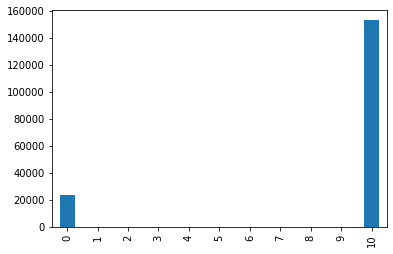

In [18]:
pred.MLX_sum.value_counts().reindex(range(11)).plot(kind = 'bar', logy = False);

In [19]:
pred_domains = pred.filter(like = 'domain')

In [20]:
pred_domains = pred_domains.fillna('NONE')

In [21]:
pred['unique_domains'] = pred_domains.apply(lambda x: np.unique(x, return_counts = True), axis = 1)

In [22]:
pred['len_unique_domains'] = pred.unique_domains.str[0].str.len()

In [23]:
pred['len_domain_mode_freq'] = pred.unique_domains.str[1].apply(max)

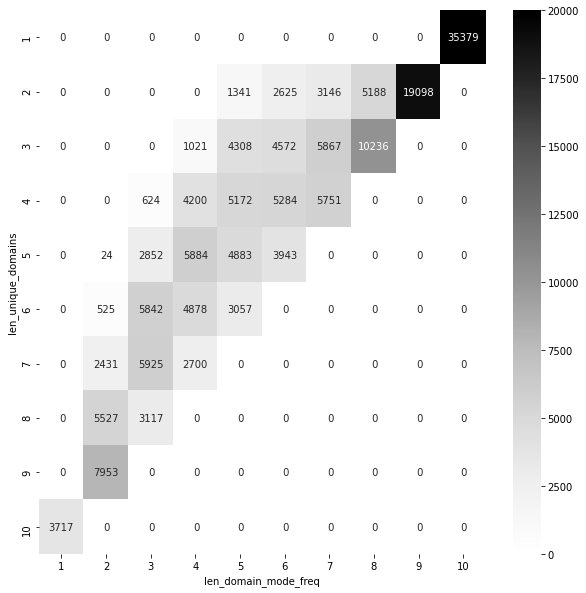

In [24]:
plt.figure(figsize = (10, 10))
sns.heatmap(pd.crosstab(index = pred.len_unique_domains, columns = pred.len_domain_mode_freq), cmap = 'Greys', vmax = 20000, annot = True, fmt = '2');